In [77]:
import requests
import requests_cache
import numpy as np
import pandas as pd
import lxml.html as lxl
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from datetime import datetime

In [78]:
ds = pd.read_csv('data scientist.csv',index_col=False)

In [8]:
ds.head()
# data_scientist.to_csv('data scientist.csv',encoding="utf-8")

,Unnamed: 0,city,job_id,need_for_position,post_date,preferred_skill,salary_lower,salary_upper,state
0,0,Newton,BA-1277535,"- BS (min GPA 3.5) or MS or PhD in science, en...",2/23/17,"Data Analytics, Informatics, Life Sciences . P...",100000.0,130000.0,MA
1,1,Sunnyvale,BF1-1327877,- Networking/Security - Experience with big d...,2/23/17,"Python, C/C++, Networking, Security, Apache Sp...",150000.0,200000.0,CA
2,2,Mercer Island,RM2-1335019,More Than 3 Years of experience and knowledge ...,2/23/17,"Big Data, Predictive Modeling, Algorithm Devel...",NaN,NaN,WA
3,3,Redwood City,AW2-1341356,Requirements: Bachelors in Computer Science or...,2/23/17,"Machine Learning, Python, R, Mapreduce, Javasc...",140000.0,225000.0,CA
4,4,Portland,CS9-1346787,Experience and knowledge of: - Machine Learnin...,2/23/17,"Machine Learning, Data Mining, Python, ETL BI,...",100000.0,120000.0,OR


In [79]:
import numpy as np
import nltk
import string
import unicodedata
from collections import Counter
from nltk.corpus import stopwords

# Skill set(DS)

In [80]:
ds_skill =",".join( ds['preferred_skill'] ).lower()
ds_needForPosition ="".join( ds['need_for_position']).lower()

In [81]:
def tokenize(text):
    s = text.lower()
    s = re.sub(r'/|\(|\)', ',', s.lower()).split(',')
    s = [i.strip() for i in s if i != '']
#     text = unicodedata.normalize('NFKD', s).encode('ascii','ignore')
#     text = text.translate(None, ",')(][].-\":")
#     text = nltk.word_tokenize(text)
    return s

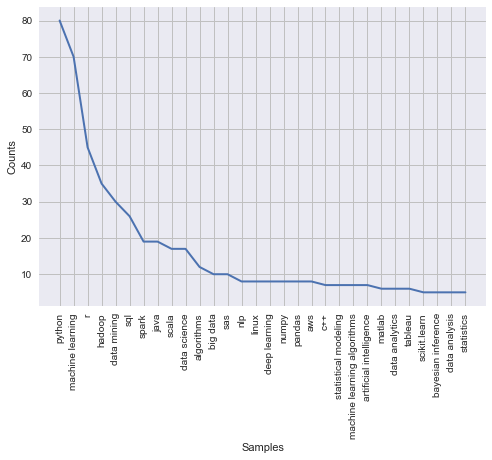

In [82]:
# skill set from prefered_skill ('sql' vs 'sql database', )
ds_filtered_skill = [word for word in tokenize(ds_skill) if word not in stopwords.words('english')] 
nltk.FreqDist(ds_filtered_skill).plot(30)

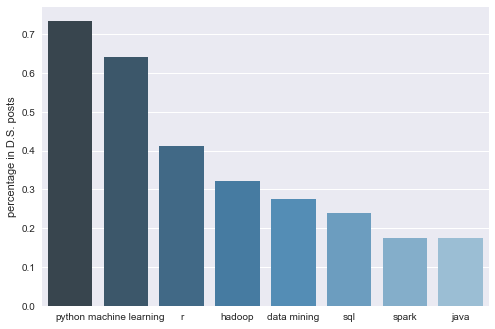

In [83]:
# Two sets of words with intersection
ds_skill_words = pd.DataFrame(nltk.FreqDist(ds_filtered_skill).most_common(8) )
ds_skill_words.iloc[:,1] = ds_skill_words.iloc[:,1] / ds.shape[0] 
ds_barplot = sns.barplot( x = 0, y = 1,data = ds_skill_words, palette = "Blues_d")
ds_barplot.set(xlabel = '', ylabel = 'percentage in D.S. posts')
plt.show()

In [87]:
ds_filtered_skill

['data analytics',
 'informatics',
 'life sciences . pharmaceutical industry',
 'java',
 'python',
 'python',
 'c',
 'c++',
 'networking',
 'security',
 'apache spark',
 'kafka',
 'elasticsearch',
 'mongodb',
 'big data',
 'predictive modeling',
 'algorithm development',
 'data mining',
 'random forest',
 'bayesian networks',
 'bayesian modeling',
 'markov chains',
 'nosql databases',
 'sql databases',
 'machine learning',
 'python',
 'r',
 'mapreduce',
 'javascrip',
 'spark',
 'streaming',
 'machine learning',
 'data mining',
 'python',
 'etl bi',
 'and data pipelines',
 'r',
 'hadoop',
 'advanced statistical analysis',
 'data analytics',
 'life sciences',
 'pharmaceuticals',
 'java',
 'python',
 'informatics',
 'big data',
 'predictive modeling',
 'algorithm development',
 'data mining',
 'random forest',
 'bayesian networks',
 'bayesian modeling',
 'markov chains',
 'nosql databases',
 'sql databases',
 'machine learning',
 'python',
 'linux',
 'java',
 'scala',
 'r',
 'spark',
 'ma

In [94]:
skill = ds_filtered_skill[:]
for n, i in enumerate(skill):
    if i == 'r':
        skill[n] = 'R+++'
print  skill

['data analytics', 'informatics', 'life sciences . pharmaceutical industry', 'java', 'python', 'python', 'c', 'c++', 'networking', 'security', 'apache spark', 'kafka', 'elasticsearch', 'mongodb', 'big data', 'predictive modeling', 'algorithm development', 'data mining', 'random forest', 'bayesian networks', 'bayesian modeling', 'markov chains', 'nosql databases', 'sql databases', 'machine learning', 'python', 'R+++', 'mapreduce', 'javascrip', 'spark', 'streaming', 'machine learning', 'data mining', 'python', 'etl bi', 'and data pipelines', 'R+++', 'hadoop', 'advanced statistical analysis', 'data analytics', 'life sciences', 'pharmaceuticals', 'java', 'python', 'informatics', 'big data', 'predictive modeling', 'algorithm development', 'data mining', 'random forest', 'bayesian networks', 'bayesian modeling', 'markov chains', 'nosql databases', 'sql databases', 'machine learning', 'python', 'linux', 'java', 'scala', 'R+++', 'spark', 'machine learning', 'python', 'linux', 'java', 'scala', 

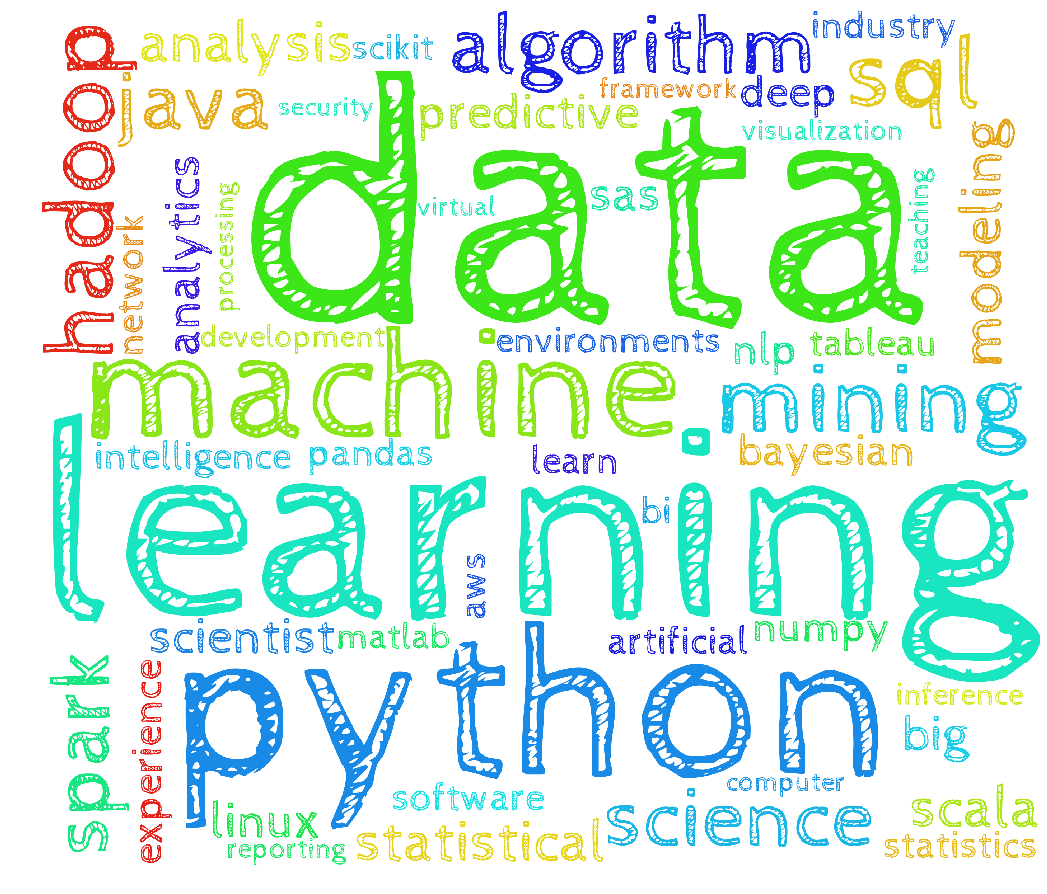

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_words=50,background_color = 'white', width = 2800,height = 2400, max_font_size = 1000,font_path='/Users/mai/Desktop/141 B/project/cabin-sketch-v1.02/CabinSketch-Regular.ttf').generate(','.join(skill))
plt.figure(figsize=(18,16))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()
# nltk.FreqDist(filtered_skill).most_common(10)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  from ipykernel import kernelapp as app


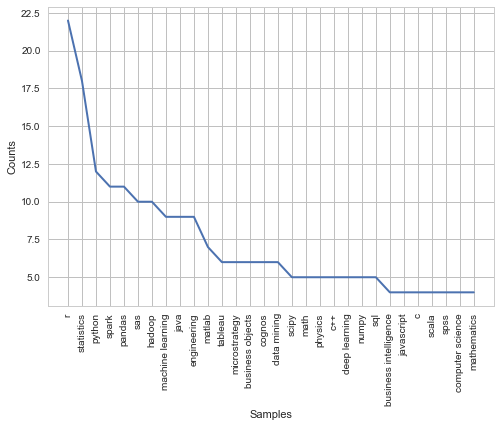

In [56]:
# skill from need_for_position
ds_filtered_needForPosition = [word for word in tokenize(ds_needForPosition) if word not in stopwords.words('english') and word not in ['etc.','e.g.']] 
nltk.FreqDist(ds_filtered_needForPosition).plot(30)
# nltk.FreqDist(filtered_needForPosition).keys()

In [43]:
# experience required (not excluding empty entry)
ds_needForPosition_list = list(ds['need_for_position'])
ds_needForPosition_list_lower = list(ds['need_for_position'].str.lower()) # all lower case
len([i for i in ds_needForPosition_list_lower if 'experi' in i]) / float(len(ds_needForPosition_list_lower))


0.8532110091743119

# Skill set (software engineering) 

In [50]:
sde = pd.read_csv('Software_Engineer.csv', index_col=False)
del sde['Unnamed: 0']
sde.head()

,city,job_id,need_for_position,post_date,preferred_skill,salary_lower,salary_upper,state
0,Lexington Park,SC4-1322959,- Bachelor's Degree or higher in Engineering o...,02/02/2017,"C#, SQL, Javascript, ASP.NET",100000.0,140000.0,MD
1,Jersey City,KB6-1330411,- Extensive hands-on technical experience in U...,01/26/2017,"Unix, IDE, Java/J2EE, Python, Linux, HTML5/CSS...",90000.0,120000.0,NJ
2,Richland,DN2-1338782,At Least 1 Year of experience and knowledge of...,01/27/2017,"C#, ASP.NET, SQL, Javascript, WPF and XAML",80000.0,110000.0,WA
3,New York City,JC6-1324151,Less Than 1 Year of experience and knowledge o...,02/16/2017,"Python, Ruby on Rails, Javascript",50000.0,140000.0,NY
4,West Hollywood,BC2-1331717,"- Experience with highly available, multi-tena...",02/15/2017,"JVM, C#, .NET, NoSQL, Git",90000.0,110000.0,CA


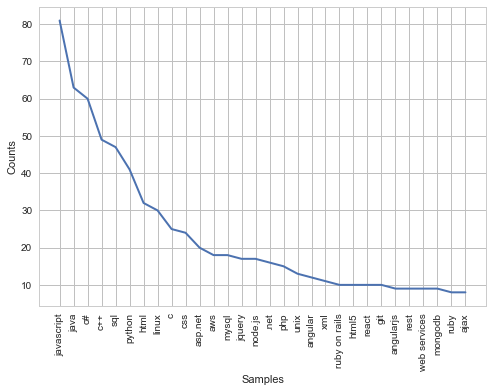

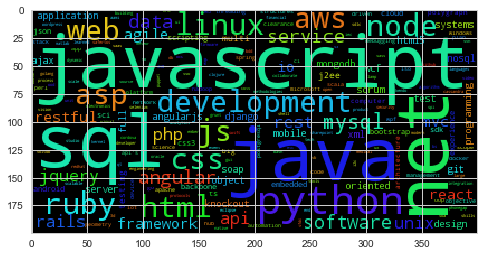

In [57]:
sde_skill =",".join( sde['preferred_skill'] ).lower()
sde_filtered_skill = [word for word in tokenize(sde_skill) if word not in stopwords.words('english')] 
nltk.FreqDist(sde_filtered_skill).plot(30)

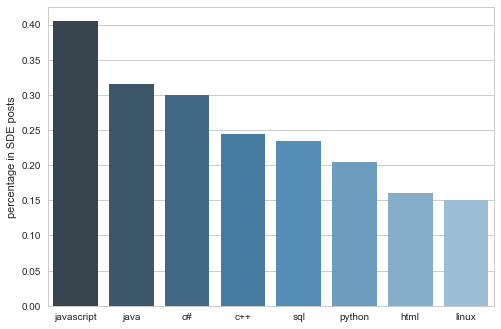

In [99]:
# Two sets of words with intersection
sde_skill_words = pd.DataFrame(nltk.FreqDist(sde_filtered_skill).most_common(8) )
sde_skill_words.iloc[:,1] = sde_skill_words.iloc[:,1] / sde.shape[0] 
sde_barplot = sns.barplot( x = 0, y = 1,data = sde_skill_words, palette = 'Blues_d')
sde_barplot.set(xlabel = '', ylabel = 'percentage in SDE posts')
plt.show()

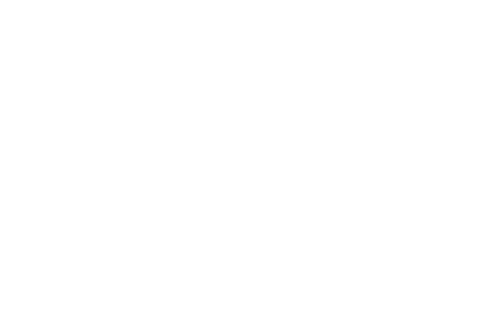

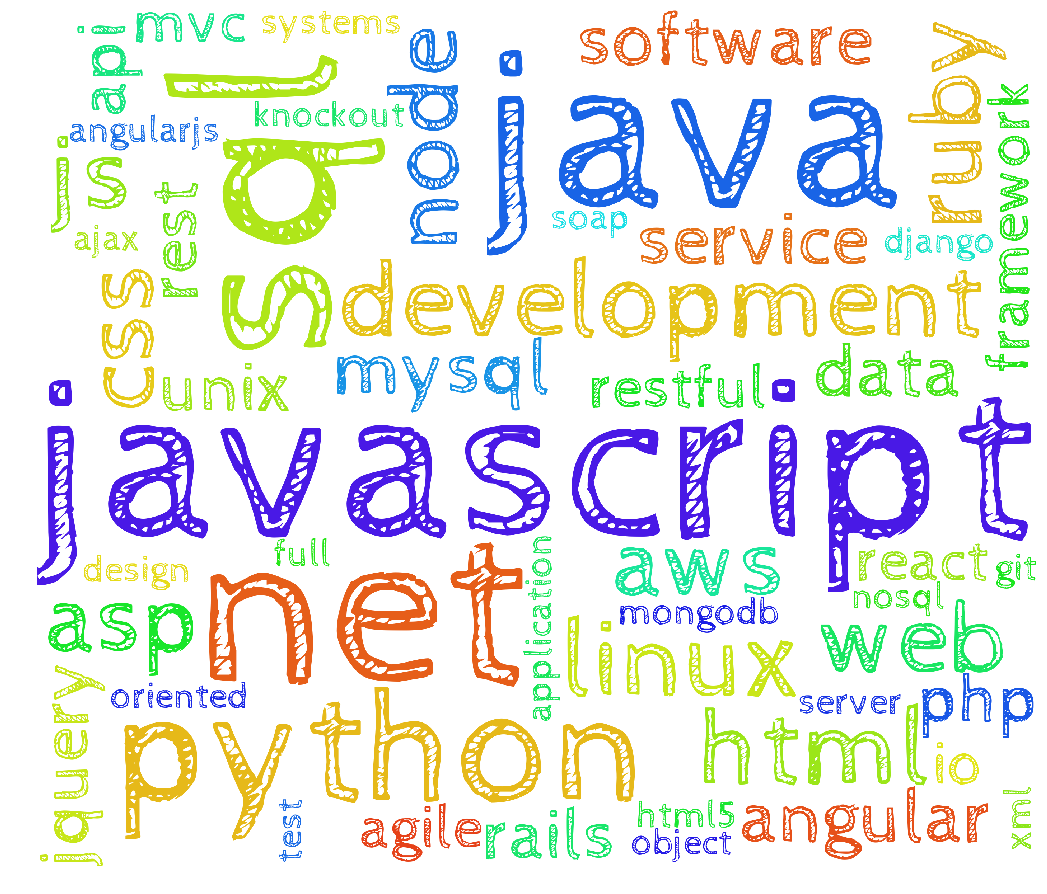

In [83]:
wordcloud = WordCloud(max_words=50,background_color = 'white', width = 2800,height = 2400, max_font_size = 1000, font_path='/Users/mai/Desktop/141 B/project/cabin-sketch-v1.02/CabinSketch-Regular.ttf').generate(','.join(sde_filtered_skill))
plt.figure(figsize=(18,16))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Degree

21 48 45
('statist', 45)
('math', 32)
('computer science', 25)
('engineer', 21)
('biolog', 5)
('econ', 1)
('physics', 10)
('chemis', 2)
('bioinformati', 4)
('life science', 5)


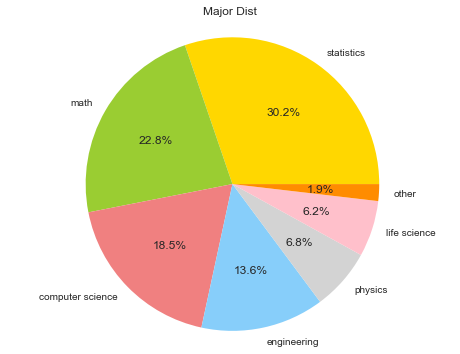

In [97]:
# degree_requirement

degree_level = ['Master', ' MS','M.S','Ph.D','PhD', 'BS','Bachelor']
degree_field = ['statist','math','computer science','engineer','biolog', 'econ','physics','chemis', 'bioinformati', 'life science']
# 'cs' contained in 'analytics', 'physics', 
bachelor_total = 0; master_total = 0; phd_total = 0;
for i in ds['need_for_position']:
    master_total = master_total + sum( (x in i) for x in ['Master', 'MS','M.S'] ) # 'algorithms', 'systems','platforms'
    bachelor_total = bachelor_total + sum((x in i) for x in ['BS', 'Bachelor'])
    phd_total = phd_total + sum( (x in i) for x in ['PhD', 'Ph.D','phd','ph.d'])
print bachelor_total, master_total, phd_total

for k in degree_field:
    a = sum( k in x for x in ds_needForPosition_list_lower)
    print (k, a)
field = [['statistics', 'math','computer science', 'engineering', 'physics','life science','other'], [49, 37, 30, 22, 11, 10, 3]]
plt.figure(figsize=(8,6))
plt.pie(field[1], labels = field[0], autopct='%1.1f%%',colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightgrey','pink','darkorange'])
plt.axis('equal')
plt.title('Major Dist')
plt.show()

In [134]:
# degree_requirement

degree_level = ['Master', ' MS','M.S','Ph.D','PhD', 'BS','Bachelor']
degree_field = ['statist','math','computer science','engineer','biolog', 'econ','physics','chemis', 'bioinformati', 'life science']
# 'cs' contained in 'analytics', 'physics', 
bachelor_total1 = 0; master_total2 = 0; phd_total3 = 0; a = 0;

count = 0 
np.array([sum((k in i) for k in ['Master', 'MS','M.S']) for i in sde['need_for_position'] if not pd.isnull(i)]).sum()
    




#     master_total = master_total + sum( (k in i) for k in ['Master', 'MS','M.S'] ) # 'algorithms', 'systems','platforms'
#     bachelor_total = bachelor_total + sum((x in i) for x in ['BS', 'Bachelor'])
#     phd_total = phd_total + sum( (x in i) for x in ['PhD', 'Ph.D','phd','ph.d'])
# print bachelor_total, master_total, phd_total

# for k in degree_field:
#     a = sum( k in x for x in sde_needForPosition_list_lower)
#     print (k, a)
# field = [['statistics', 'math','computer science', 'engineering', 'physics','life science','other'], [49, 37, 30, 22, 11, 10, 3]]
# plt.figure(figsize=(8,6))
# plt.pie(field[1], labels = field[0], autopct='%1.1f%%',colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightgrey','pink'])
# plt.axis('equal')
# plt.title('Major Dist')
# plt.show()


33